In [30]:
## This is used to generate data with different SNR:
"""
W, H: Uniform (0, 1), 
N ∈ R5000×5000 by sampling randomly from N(0,0.01^2),
gen- erate the data matrix using X = WH +N. 
"""
import numpy as np
import matplotlib.pylab as plt
import scipy.io as sio

In [ ]:
noise_level_std = [0.001, 0.01, 0.1, 0.4, 0.7]
data_dir = "../Dataset/syn_dataset/"
for i in range(5):
    np.random.seed(i)
    N = np.random.normal(0, noise_level_std[i], (5000, 5000))
    W = np.random.uniform(0, 1, (5000, 1000))
    H = np.random.uniform(0, 1, (1000, 5000))
    snr_val = noise_level_std[i]/np.std(W@H)
    print(np.var(W@H), np.std(W@H), snr_val)
    X = np.abs(W @ H + N) 
    tmp_res = {}
    tmp_res['X'] = X
    tmp_res['W'] = W
    tmp_res['H'] = H
    tmp_res['N'] = N
    np.save(f"{data_dir}syn_noise_{snr_val:.5f}_all.npy", tmp_res)
    np.save(f"{data_dir}syn_noise_{snr_val:.5f}_X.npy", X)
    sio.savemat(f'{data_dir}syn_noise_{snr_val:.5f}.mat', {'X':X})

48.302528484433324 6.950002049239505 0.00014388484966122042
48.96162159591103 6.997258148440076 0.001429131209376538
47.77393208486742 6.9118689285075 0.014467866945155353
49.15394481681801 7.010987435220378 0.05705330435917786
49.49241067470729 7.035084269197299 0.09950129567955691


In [ ]:
## Save SVD solutions
from scipy.sparse.linalg import svds
import numpy.linalg as LA
data_dir = "../syn_dataset/"
syn_vals = [0.000140, 0.00143, 0.01447, 0.05705, 0.09950]
r = 50
svds_vals = {}
for snr_val in syn_vals:
    tmp = np.load(f"{data_dir}syn_noise_{snr_val:.5f}_all.npy", allow_pickle=True).all()
    print(np.min(tmp['X']), snr_val)
    data_mat = tmp['X']
    tmp_svd_error = {}
    for latent_dim in [50, 100, 200, 400, 500]:
        ueig, s, vteig = svds(data_mat, latent_dim)
        print("latent dim ", latent_dim)
        print("min and max val of ueig ", np.min(ueig), np.max(ueig))
        print("min and max val of veig and s[-4:]", np.min(vteig), np.max(vteig), s[-4:])
        tmp_svd_error[f"{latent_dim}"] = LA.norm(data_mat - ueig@np.diag(s) @ vteig)
        print("error given by svd:", tmp_svd_error[f"{latent_dim}"] )
    svds_vals[f"{snr_val:.5f}"] = tmp_svd_error
np.save("syn_noise_svds.npy", svds_vals)

214.60294010817262 0.00014
latent dim  50
min and max val of ueig  -0.061605192291771284 0.07035247035349416
min and max val of veig and s[-4:] -0.06146765943392927 0.060538564501377186 [6.88525942e+02 6.93148634e+02 6.96989453e+02 1.25075690e+06]
error given by svd: 12341.52937837046
latent dim  100
min and max val of ueig  -0.07035247035349397 0.06633461440034422
min and max val of veig and s[-4:] -0.06215499947916083 0.06146765943394809 [6.88525942e+02 6.93148634e+02 6.96989453e+02 1.25075690e+06]
error given by svd: 11572.713066107794
latent dim  200
min and max val of ueig  -0.0703524703534957 0.06593307039897037
min and max val of veig and s[-4:] -0.06442579024966776 0.06427308152168815 [6.88525942e+02 6.93148634e+02 6.96989453e+02 1.25075690e+06]
error given by svd: 10163.311019391267
latent dim  400
min and max val of ueig  -0.07035247035349274 0.07335661634924884
min and max val of veig and s[-4:] -0.0656340988786204 0.07511993560831812 [6.88525942e+02 6.93148634e+02 6.9698945

In [ ]:
np.random.seed(1)
### 0.01 is the standard deviation
N = np.random.normal(0, 0.01,(5000, 5000))
W = np.random.uniform(0, 1, (5000, 1000))
H = np.random.uniform(0, 1, (1000, 5000))
#cal_SNR = np.var(W@H)
print(np.var(W@H), np.std(W@H), 0.01/np.std(W@H))
X = W @ H + N

In [ ]:
import math

def cal_SNR(ratio, SNR_val):
    tmp_val = 20 * math.log10(ratio)
    print("SNR val:", tmp_val)
    print("ratio:", 10**(SNR_val/20))
    
cal_SNR(1, 20)

SNR val: 0.0
ratio: 10.0


(array([2.760000e+02, 2.426100e+04, 5.133490e+05, 3.611234e+06,
        9.067851e+06, 8.368308e+06, 2.973428e+06, 4.182530e+05,
        2.264800e+04, 3.920000e+02]),
 array([214.59753162, 221.78077776, 228.9640239 , 236.14727004,
        243.33051619, 250.51376233, 257.69700847, 264.88025461,
        272.06350075, 279.24674689, 286.42999303]),
 <a list of 10 Patch objects>)

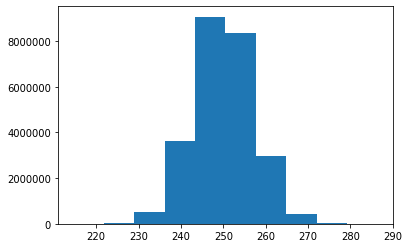

In [10]:
plt.hist(X.flatten())

(array([1.560000e+02, 1.462300e+04, 4.177090e+05, 3.616907e+06,
        9.840967e+06, 8.544189e+06, 2.356238e+06, 2.037750e+05,
        5.397000e+03, 3.900000e+01]),
 array([-0.05490828, -0.04364695, -0.03238563, -0.0211243 , -0.00986297,
         0.00139835,  0.01265968,  0.02392101,  0.03518233,  0.04644366,
         0.05770499]),
 <a list of 10 Patch objects>)

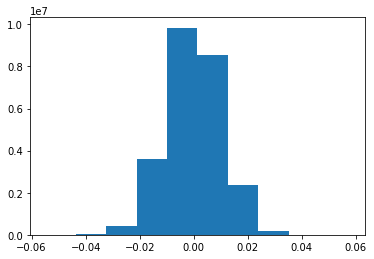

In [7]:
plt.hist(N.flatten())